In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from scipy.linalg import svd
# from sklearn import linear_model
import seaborn as sns
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import scipy.stats as stats
# import matplotlib.cm as cm
# from IPython.display import display

from mpl_toolkits.mplot3d import Axes3D
# from sklearn.feature_selection import f_regression
# from statsmodels.stats.anova import anova_lm

from sklearn.preprocessing import PolynomialFeatures
import scipy.special

Making MI_calc for **Mental Illness * Control → Punishment** across conditions

In [3]:
MI_all = pd.read_csv("/Users/merieldoyle/Desktop/ckMI/data/condition.csv", index_col = False)
MI_all = pd.DataFrame(MI_all)

In [34]:
MI_all['control_med'] = MI_all.control > MI_all.control.median()
MI_all['control_med'] = np.where(MI_all.control_med == False, 'below median', 'above median')
MI_all

,Condition,mental,change,want_change,genes,punish,control,wrong,distress,common,control_med
0,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median
1,pedo,3.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,8.0,above median
2,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median
3,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median
4,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median
...,...,...,...,...,...,...,...,...,...,...,...
12225,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median
12226,schizo,4.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0,77.0,above median
12227,schizo,7.0,7.0,5.0,4.0,4.0,1.0,1.0,5.0,40.0,below median
12228,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median


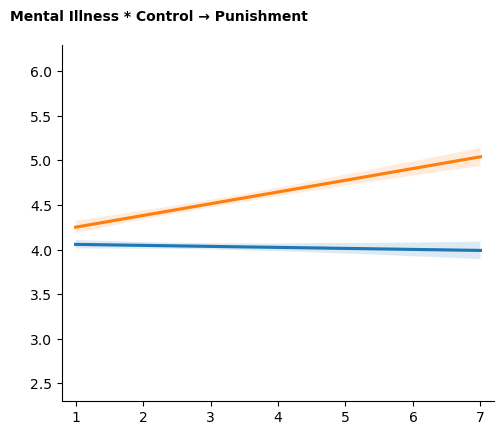

In [17]:
mc_all = sns.lmplot(
    data = MI_all, 
    x = 'mental', y = 'punish', hue = 'control_med',
    markers = 'o', legend = False,
    scatter_kws = {'alpha': 0.000001})
mc_all.set(ylim = (2.3, 6.3), xlim = (0.8, 7.2), ylabel = "", xlabel = "")

# mc_all.add_legend(legend_data = mc_all._legend_data, 
#               title = 'control_cat\n', # \n adds a space between title and elements
#               prop = {'size': 16}, 
#               edgecolor = 'lightgray',
#               frameon = True, fancybox = True) # legend title
# mc_all._legend.get_title().set_weight('bold') # bold title
# mc_all._legend.get_title().set_size('17') # bold title

# for lh in mc_all._legend.legendHandles: 
#     lh.set_alpha(1)
#     lh._sizes = [50] 
    
# for ax, title in zip(mc_all.axes.flat, custom_titles):
#     ax.set_title(title, fontsize = 16, fontweight = "bold")

mc_all.fig.suptitle('Mental Illness * Control → Punishment', x = 0.3, y = 0.90, size = 10, fontweight = "bold")
mc_all.fig.subplots_adjust(top = .83, hspace = 0.1)

# mc_all.fig.text(0.47, -0.01, 'mental illness', ha='center', va='center', fontsize=16, fontweight='bold') # common x-label
# mc_all.fig.text(-0.01, 0.45, 'punish', ha='center', va='center', fontsize=16, fontweight='bold', rotation='vertical') # common y-label

# for ax in mc_all.axes.flat:
#     ax.set_facecolor('#F0F0F0')  # set background color
#     ax.yaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint horizontal gridlines
#     ax.xaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint vertical gridlines
#     ax.set_axisbelow(True)  # put gridlines below bar plots

plt.show(mc_all)

In [6]:
# # calculate percentage of "above median" occurrences for each condition
# condition_perc = MI_all.groupby(['Condition', 'control_med']).size().unstack(fill_value=0).reset_index()
# condition_perc['above_median_perc'] = condition_perc['above median'] / (condition_perc['above median'] + condition_perc['below median']) * 100

# # sort by percentage of "above median" occurrences
# condition_perc_sorted = condition_perc.sort_values(by='above_median_perc', ascending=False)

In [7]:
# top_5 = condition_perc_sorted.head(5)
# bottom_5 = condition_perc_sorted.tail(5)

# selected_conditions = pd.concat([top_5, bottom_5])

In [8]:
# MI_filtered = MI_all[MI_all['Condition'].isin(selected_conditions['Condition'])]

# def set_control_hue(row):
#     if row['Condition'] in top_5['Condition'].values:
#         return 'above median'
#     else:
#         return 'below median'

# MI_filtered['control_hue'] = MI_filtered.apply(set_control_hue, axis=1)

In [9]:
# # GPT DID NOT TELL ME TO DO THIS

# MI_all = MI_filtered

# # calculate the mean 'control' value for each mental illness condition
# punish_mean_per_condition = MI_all.groupby('Condition')['punish'].mean().reset_index()

# # rename the columns to merge them later
# punish_mean_per_condition.columns = ['Condition', 'punish_mean']

# # merge the mean control values to the MI_all DataFrame, matching the rows based on the 'Condition' column
# MI_all = MI_all.merge(punish_mean_per_condition, on='Condition', how='left')

# # MI_all.control.median() = 3

In [10]:
# # GPT DID NOT TELL ME TO DO THIS

# # MI_all = MI_filtered

# mental_mean_per_condition = MI_all.groupby('Condition')['mental'].mean().reset_index()

# mental_mean_per_condition.columns = ['Condition', 'mental_mean']

# MI_all = MI_all.merge(mental_mean_per_condition, on='Condition', how='left')

# # MI_all.control.median() = 3

# MI_all

In [11]:
# MI_all.to_csv('/Users/merieldoyle/Desktop/ckMI/data/MI_all.csv', index=False)

In [12]:
MI_calc = pd.read_csv("/Users/merieldoyle/Desktop/ckMI/data/MI_calc.csv", index_col = False)
MI_calc

,Condition,mental,change,want_change,genes,punish,control,wrong,distress,common,control_med,control_hue,punish_mean,mental_mean
0,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,above median,5.408714,5.618257
1,pedo,3.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,8.0,above median,above median,5.408714,5.618257
2,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,above median,5.408714,5.618257
3,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,above median,5.408714,5.618257
4,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,above median,5.408714,5.618257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12225,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median,3.118503,6.363825
12226,schizo,4.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0,77.0,above median,below median,3.118503,6.363825
12227,schizo,7.0,7.0,5.0,4.0,4.0,1.0,1.0,5.0,40.0,below median,below median,3.118503,6.363825
12228,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median,3.118503,6.363825


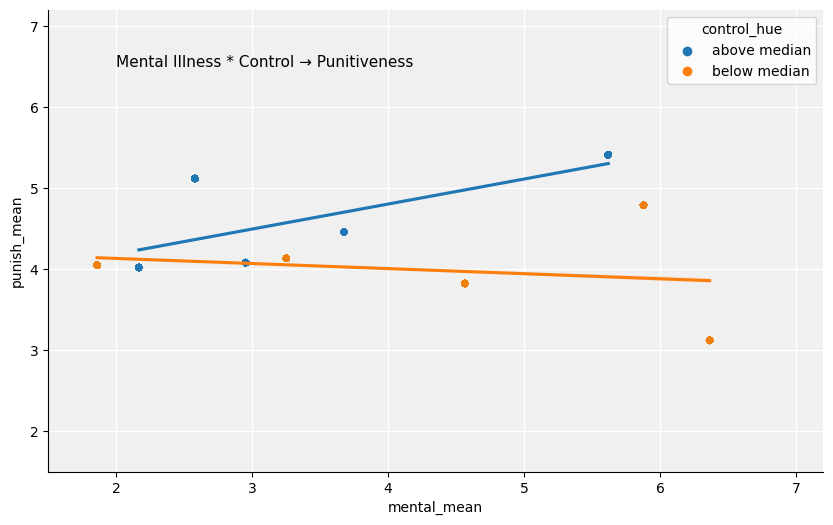

In [46]:
plt.figure(figsize=(10, 6))

# create scatterplot with hue
mc_all = sns.scatterplot(
    data=MI_calc,
    x='mental_mean',
    y='punish_mean',
    hue='control_hue',
    alpha=0.005
)

# get unique hue categories
hue_categories = MI_calc['control_hue'].unique()

# for each hue catego, plot regression line with confidence intervals
for hue_category in hue_categories:
    data_subset = MI_calc[MI_calc['control_hue'] == hue_category]
    mc_all = sns.regplot(
        data=data_subset,
        x='mental_mean',
        y='punish_mean',
        scatter=False  # Hide the scatter points
    )
    
mc_all.axes.set_facecolor('#F0F0F0')  # set background color
mc_all.axes.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint horizontal gridlines
mc_all.axes.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint vertical gridlines
mc_all.axes.set_axisbelow(True)  # put gridlines below bar plots

mc_all.spines['top'].set_visible(False)
mc_all.spines['right'].set_visible(False)

plt.xlim(1.5, 7.2)
plt.ylim(1.5, 7.2)

plt.text(2, 6.5, 'Mental Illness * Control → Punitiveness', fontsize=11)

plt.show()

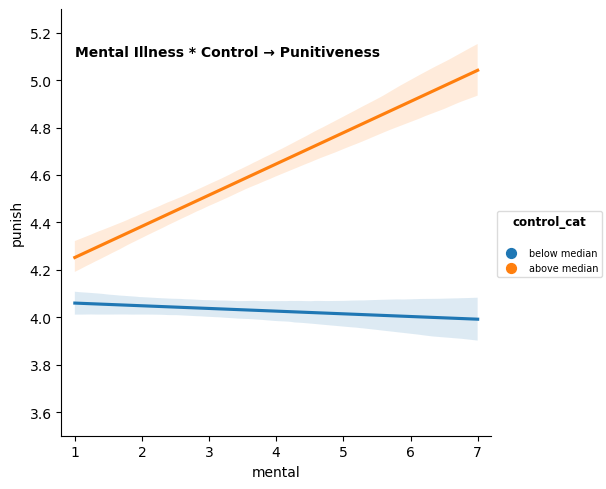

In [70]:
mc = sns.lmplot(
    data = MI_calc, 
    x = 'mental', y = 'punish', hue = 'control_med', 
    markers = 'o', legend = False,
    scatter_kws = {'alpha': 0.000001})
mc.set(xlim = (0.8,7.2), ylim = (3.5, 5.3))

mc.add_legend(legend_data = mc._legend_data, 
              title = 'control_cat\n', # \n adds a space between title and elements
              prop = {'size': 7}, 
              edgecolor = 'lightgray',
              frameon = True, fancybox = True) # legend title
mc._legend.get_title().set_weight('bold')
mc._legend.get_title().set_size('8.5')

for lh in mc._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50] 
    
plt.text(1, 5.1, 'Mental Illness * Control → Punitiveness', fontsize=10, fontweight="bold")

# save_directory = "/Users/merieldoyle/Desktop/ckMI/results/figures/moderations/"
# file_name = "SAMPLE-mental-control-punish-ALL.png"
# save_path = save_directory + file_name

# plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()